In [12]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
import sys

In [2]:
# suppressing warning messages
warnings.filterwarnings('ignore')

In [3]:
# importing scripts
sys.path.insert(1, '../scripts')

from data_viz import Data_Viz
from data_cleaning import DataCleaner
from data_transformation import DataTransformer

DV = Data_Viz()
DC = DataCleaner()
DT = DataTransformer()

In [4]:
# loading dataset

test = pd.read_csv("../data/test_store.csv")
train = pd.read_csv("../data/train_store.csv")

# Univariate Analysis

### Comparing distribution of the test and train dataset

In [5]:
sample_train = train.sample(n=41088, random_state= 5)
promo_total = sample_train.shape[0]
promo_yes = sample_train.loc[sample_train["Promo2"] ==1].shape[0]
promo_per = (promo_yes/promo_total)

print(promo_per, promo_total, promo_yes)

0.5034803348909658 41088 20687


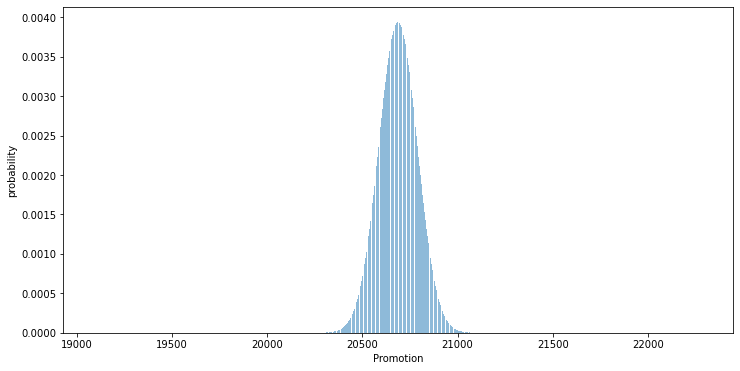

mean = 20687.0
variance = 10271.502312110591


In [6]:
DV.binom_distribution(promo_yes, promo_total, promo_per)

In [7]:
promo_total_t = test.shape[0]
promo_yes_t = test.loc[test["Promo2"] ==1].shape[0]
promo_per_t = (promo_yes_t/promo_total_t)

print(promo_per_t, promo_total_t, promo_yes_t)

0.580607476635514 41088 23856


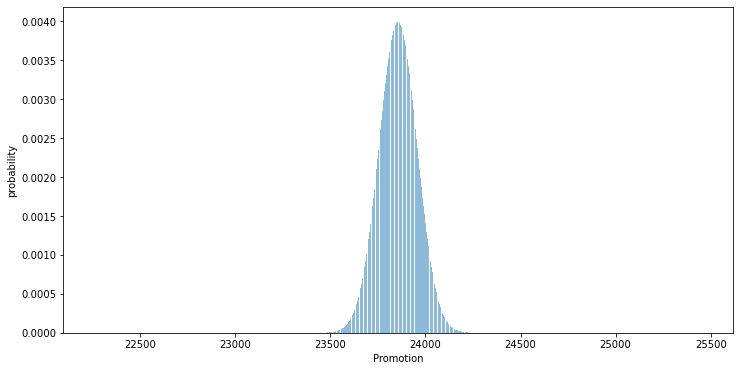

mean = 23856.0
variance = 10005.028037383177


In [8]:
DV.binom_distribution(promo_yes_t, promo_total_t, promo_per_t)

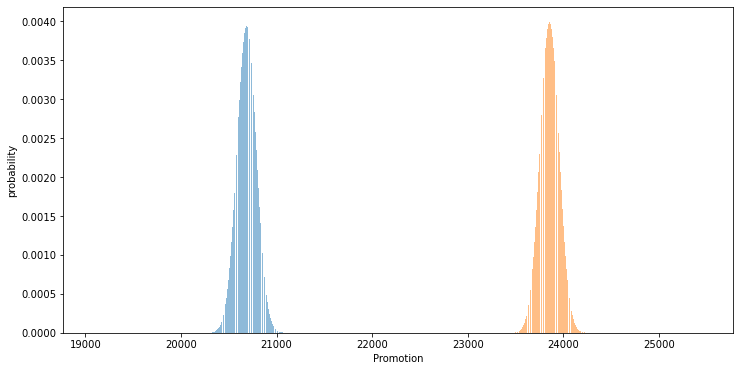

In [9]:
DV.compare_binom_dist(promo_yes, promo_yes_t, promo_total, promo_total_t, promo_per, promo_per_t)

**Observation**
- Both the test dataset and the train dataset have quite close distributions

# Bivariate Analysis

### Sales and Holidays

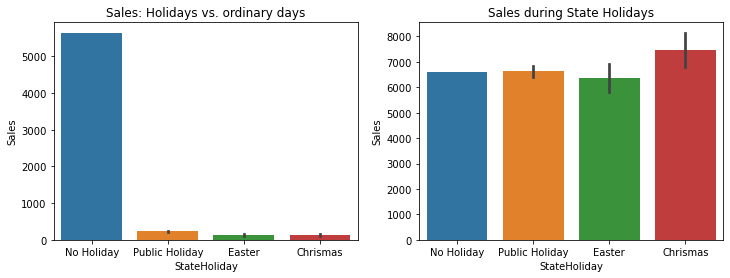

In [10]:
# comparing holiday day sales with non Holiday ones

x_axes = ['StateHoliday', 'StateHoliday']
y_axes = ['Sales', "Sales"]

holidays = train.query("StateHoliday != 'No_holiday'")
df2 = holidays[(holidays["StateHoliday"] != "0") & (holidays["Sales"] > 0)]

dfs = [train, df2 ]
titles = ['Sales: Holidays vs. ordinary days', 'Sales during State Holidays']
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(12,4))

DV.plot_bar(x_axes, y_axes, dfs, titles, [axis1, axis2])

**Observations**
- comparing no holidays vs. state holidays the purchase during no holidays is more
- comparing the purchase behavior between state holidays: Easter has more purchase, wile public holiday has less purchase

### Sales and Customers

<AxesSubplot:>

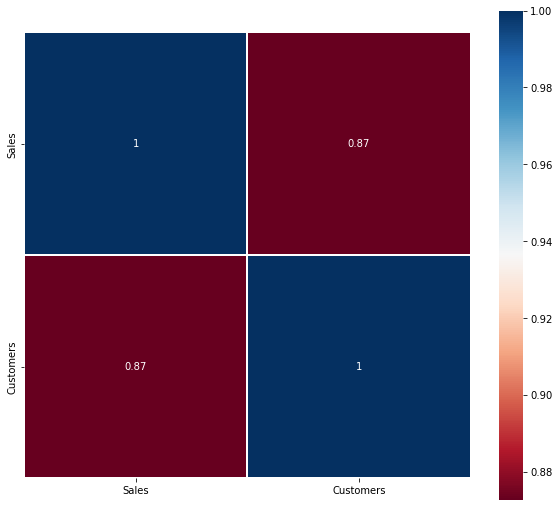

In [13]:
sales_customers = train[['Sales', 'Customers']]
plt.figure(figsize=(10,9))
sns.heatmap(sales_customers.corr(), linewidths=0.1, vmax=1.0, 
            square=True, cmap=plt.cm.RdBu, linecolor='white', annot=True)

**Observation**
- There is a very high correlation between customers number and salesmm